**Initialization of Pandas, sklearn, numpy, matplotlib.**

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to view the plots in the jupyter notebook inline
%matplotlib inline
#to create the confusion matrix
from sklearn import metrics
#to split the dataset into train and test
from sklearn.model_selection import train_test_split
#to apply logistic regresison
from sklearn.linear_model import LogisticRegression

- **Marks1**- Marks of the student in the 1st subject
- Marks2- Marks of the student in the 2nd subject
- Admission- Response variable which has value either 0 or 1.
- **1** means the student will **get admission** and **0** means **no admission**.

In [140]:
df=pd.read_csv("./datasets/student_data_synthetic_extreme_noisy.csv")


In [142]:
#check top records
df.head()

,Marks 1,Marks 2,Admission
0,92.934283,79.481679,1
1,51.234714,56.298354,0
2,74.953771,53.461560,1
3,68.460597,50.233526,0
4,78.316933,83.619990,1


In [144]:
#check info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Marks 1    50 non-null     float64
 1   Marks 2    50 non-null     float64
 2   Admission  50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [146]:
#split dataset in features and target variable
feature_cols = ['Marks 1', 'Marks 2']
X = df[feature_cols] # Features
y = df.Admission # Target variable

In [148]:
#finding whether dataset is imbalanced?
class_counts = df["Admission"].value_counts()
# Print class counts
print(class_counts)

Admission
1    35
0    15
Name: count, dtype: int64


<Axes: xlabel='Marks 1', ylabel='Marks 2'>

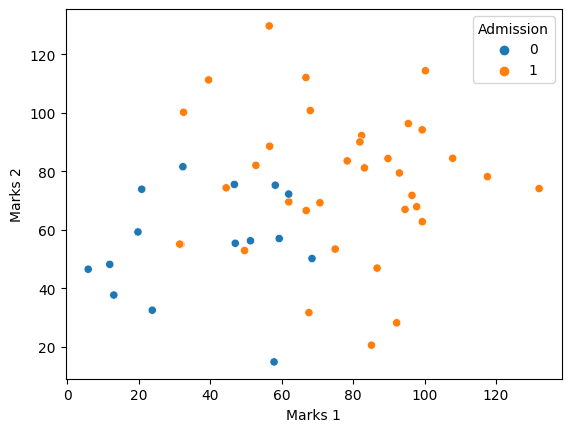

In [150]:
#visualize imbalanced dataset
import seaborn as sns
sns.scatterplot(x=df["Marks 1"], y=df["Marks 2"], hue=df["Admission"])

In [152]:
print(X.head())


     Marks 1    Marks 2
0  92.934283  79.481679
1  51.234714  56.298354
2  74.953771  53.461560
3  68.460597  50.233526
4  78.316933  83.619990


In [154]:
print(y.head())

0    1
1    0
2    1
3    0
4    1
Name: Admission, dtype: int64


**use the function train_test_split() which is a part of sklearn library. This has majorly 4 argument-**

- **Independent variable X**
- Dependent variable y
- Test_size-->This basically says the **percentage of records we want to put in the test dataset**.
- There is no specific rule on how much we should keep but ideally, it can be 40% or 30% or even 50%. This completely depends on the size of the dataset. If we have more samples, we can go ahead with more records in test dataset else less.
-  for 100% records in our dataset and so **keep 25% records in test dataset** and **the remaining 75% in training dataset.**
Random_state- to maintain the **reproducibility of the random splitted data**

In [157]:
#split the dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

X_train.shape



(37, 2)

In [161]:
X_test.shape

(13, 2)

**import the Logistic Regression module from sklearn.linear_model.**
- And then  create the logistic regression in python using LogisticRegression() function.

In [164]:
# instantiate the model using the default parameters
m1 = LogisticRegression(class_weight='balanced', penalty='l2', solver='lbfgs', max_iter=1000)

# fit the model with data
m1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [166]:
m1.score(X_test,y_test)

0.9230769230769231

In [170]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(m1, X, y, cv=5)
print("Cross-Validation Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy: 0.78


**use the predict() function for the prediction on the test dataset.**
**It takes the testing dataset (X_test in our case) as an argument.**

In [173]:
#prediction on test dataset
y_pred=m1.predict(X_test)

y_test

17    0
2     1
20    1
31    1
24    1
1     0
12    0
8     1
11    1
34    1
33    1
43    0
13    1
Name: Admission, dtype: int64

In [175]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [207]:
#new prediction
new_pred=m1.predict([[60,70]])
new_pred

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**A confusion matrix** is basically a two-way frequency table which is used to find the accuracy and error of the model. This tells about the number of correct and incorrect predictions for both 1 and o.

### 🎓 **Confusion Matrix For Admission Data**

|                     | **Predicted: Not Admitted (0)** | **Predicted: Admitted (1)** |
|--------------------|---------------------------------|-----------------------------|
| **Actual: Not Admitted (0)**  | ✅ **True Negative (TN)**   | ❌ **False Positive (FP)**    |
| **Actual: Admitted (1)**      | ❌ **False Negative (FN)**   | ✅ **True Positive (TP)**    |

---

### ✅ **Meaning Of The Matrix:**
- **True Negative (TN):** Student was **not admitted** and model also predicted **not admitted**. ✔️
- **False Positive (FP):** Student was **not admitted**, but model **wrongly predicted admitted**. ❌
- **False Negative (FN):** Student was **admitted**, but model **wrongly predicted not admitted**. ❌
- **True Positive (TP):** Student was **admitted** and model also predicted **admitted**. ✔️


In [183]:
#confusion matrix
c1 = metrics.confusion_matrix(y_pred, y_test)
print(c1)

print("actual correct matrix")
tp=c1[1][1]
tn=c1[0][0]
fp=c1[0][1]
fn=c1[1][0]
print(np.array([tp,fn,fp,tn]))

[[4 1]
 [0 8]]
actual correct matrix
[8 0 1 4]


### ✅ **Performance Metrics For Admission Data**

- **Accuracy:**  
   - This is derived directly from the **Confusion Matrix** we drew above.  
   - It tells us **how often** the model's prediction was **correct** overall.  
   - **Formula:**  
   ```  
   Accuracy = (TP + TN) / (TP + TN + FP + FN)  
   ```  

- **Precision:**  
   - It's about **being precise**!  
   - It shows **how accurate our model is**  
   when it predicts that a student **got admission** (i.e., Admitted = 1).  
   - **Formula:**  
   ```  
   Precision = TP / (TP + FP)  
   ```  

- **Recall:**  
   - This metric tests **how correctly** our model is  
   able to predict that the student **got admission**.  
   - **Formula:**  
   ```  
   Recall = TP / (TP + FN)  
   ```  
- **classificati**on

In [186]:
#evaluation metrices
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9230769230769231
Precision: 1.0
Recall: 0.8888888888888888


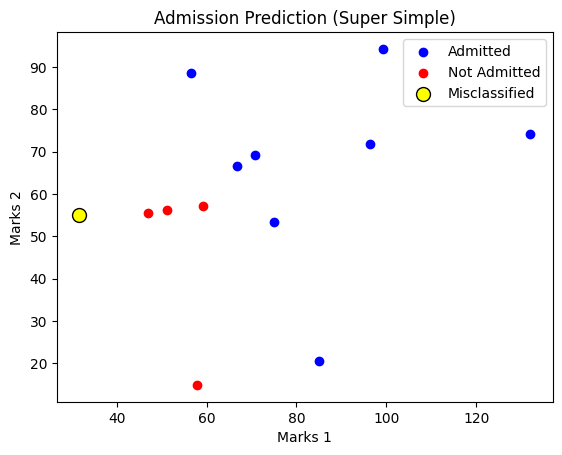

In [198]:
# Plot Admitted students (predicted correctly)
plt.scatter(X_test[y_pred==1]['Marks 1'], X_test[y_pred==1]['Marks 2'], color='blue', label='Admitted')

# Plot Not Admitted students (predicted correctly)
plt.scatter(X_test[y_pred==0]['Marks 1'], X_test[y_pred==0]['Marks 2'], color='red', label='Not Admitted')

# Plot Misclassified points (highlight in yellow)
misclassified = (y_test != y_pred)
plt.scatter(X_test[misclassified]['Marks 1'], X_test[misclassified]['Marks 2'], 
            color='yellow', edgecolor='k', s=100, label='Misclassified')

# Add labels and title
plt.xlabel('Marks 1')
plt.ylabel('Marks 2')
plt.title('Admission Prediction (Super Simple)')

# Add a simple legend
plt.legend()

# Show the plot
plt.show()
